### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
urate = pd.read_csv('data.csv')
mvdata = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

In [4]:
urate.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
mvdata.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [6]:
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [7]:
urate.info()
mvdata.info()
user.info()
mvdata.shape
urate.describe

total1 = urate.isnull().sum().sort_values(ascending=False)
total2 = mvdata.isnull().sum().sort_values(ascending=False)
total3 = user.isnull().sum().sort_values(ascending=False)

print(total1)
print(total2)
print(total3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Doc

#### 4. Find the number of movies per genre using the item data - 5 marks

In [8]:
# use sum on the default axis
# mvdata.sum(axis=0)
pd.DataFrame(mvdata.iloc[:,np.r_[3:mvdata.shape[1]]].sum(axis=0), columns= ['Number of movies per genre'])

,Number of movies per genre
unknown,1
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725
Fantasy,22


#### 5. Find the movies that have more than one genre - 2.5 marks

In [9]:
#hint: use sum on the axis = 1
ngenre = pd.DataFrame(mvdata.iloc[:,np.r_[3:mvdata.shape[1]]].sum(axis=1),columns = ['# of genres'])
mvdata1 = mvdata
mvdata1['ngenre'] = ngenre['# of genres']
mvdata1 = mvdata1[mvdata1.ngenre > 1]
mvdata1=mvdata1.drop(columns=['ngenre'])
mvdata=mvdata.drop(['ngenre'],axis=1)
mvdata.shape

(1681, 22)

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [10]:
mvdata=mvdata[mvdata.unknown!=1]
mvdata.shape

(1680, 22)

In [11]:
mvdata.head(10)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe,01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III,22-Jan-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

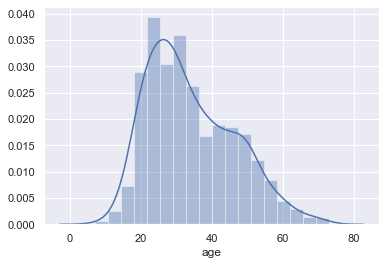

In [12]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

sns.distplot(user['age']);

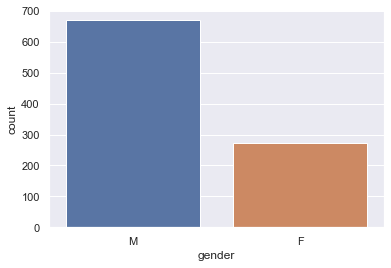

In [13]:
sns.countplot(user['gender']);

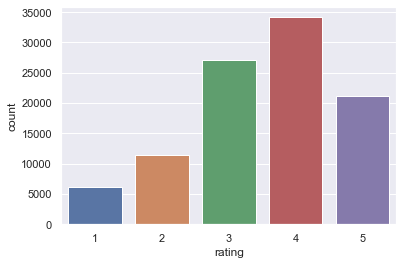

In [14]:
sns.countplot(urate['rating']);

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


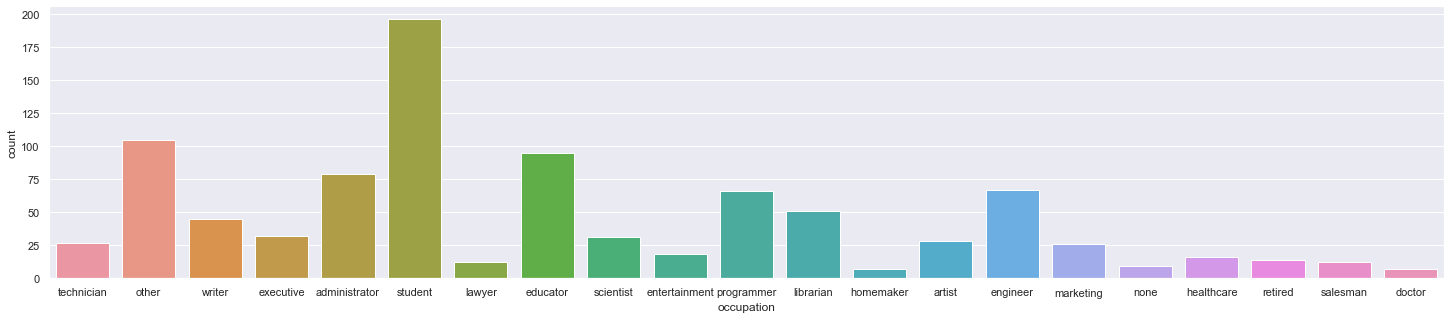

In [15]:
plt.figure(figsize=(25,5))
sns.countplot(user['occupation']);
mvdata.head()

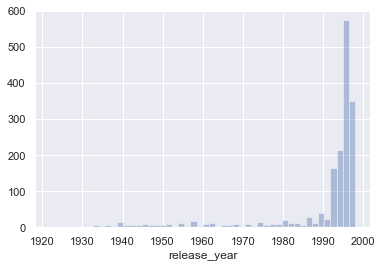

In [16]:
mvdata['release_year']=mvdata['release date'].str.split("-", n = 0, expand = True)[2]
sns.distplot(mvdata['release_year'], kde=False,  rug=False)

In [17]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [18]:
mvdata.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1680.000000,1680.0,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,841.525595,0.0,0.149405,0.080357,0.025000,0.072619,0.300595,0.064881,0.029762,0.431548,0.013095,0.014286,0.054762,0.033333,0.036310,0.147024,0.060119,0.149405,0.042262,0.016071
std,485.609591,0.0,0.356593,0.271926,0.156171,0.259587,0.458653,0.246389,0.169980,0.495440,0.113717,0.118701,0.227583,0.179559,0.187115,0.354235,0.237778,0.356593,0.201246,0.125788
min,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.750000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.250000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#your answers here
mvdata.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [20]:
#Your answer here
mv = mvdata.groupby(['release_year']).sum()
mv.drop(columns=['movie id'],inplace=True)
mv.tail(10)

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1989,0,6,4,0,0,3,1,0,8,0,0,0,0,0,1,2,2,2,0
1990,0,7,1,0,1,6,3,2,12,0,1,1,0,0,4,0,4,0,2
1991,0,2,1,1,1,6,0,1,11,1,0,1,2,0,0,4,3,1,0
1992,0,8,1,2,1,12,5,0,14,0,0,6,1,1,7,3,5,2,1
1993,0,20,9,1,6,39,7,4,64,0,1,5,2,6,16,8,17,4,2
1994,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2
1997,0,46,20,3,22,87,30,6,113,4,2,8,5,18,51,13,54,14,0


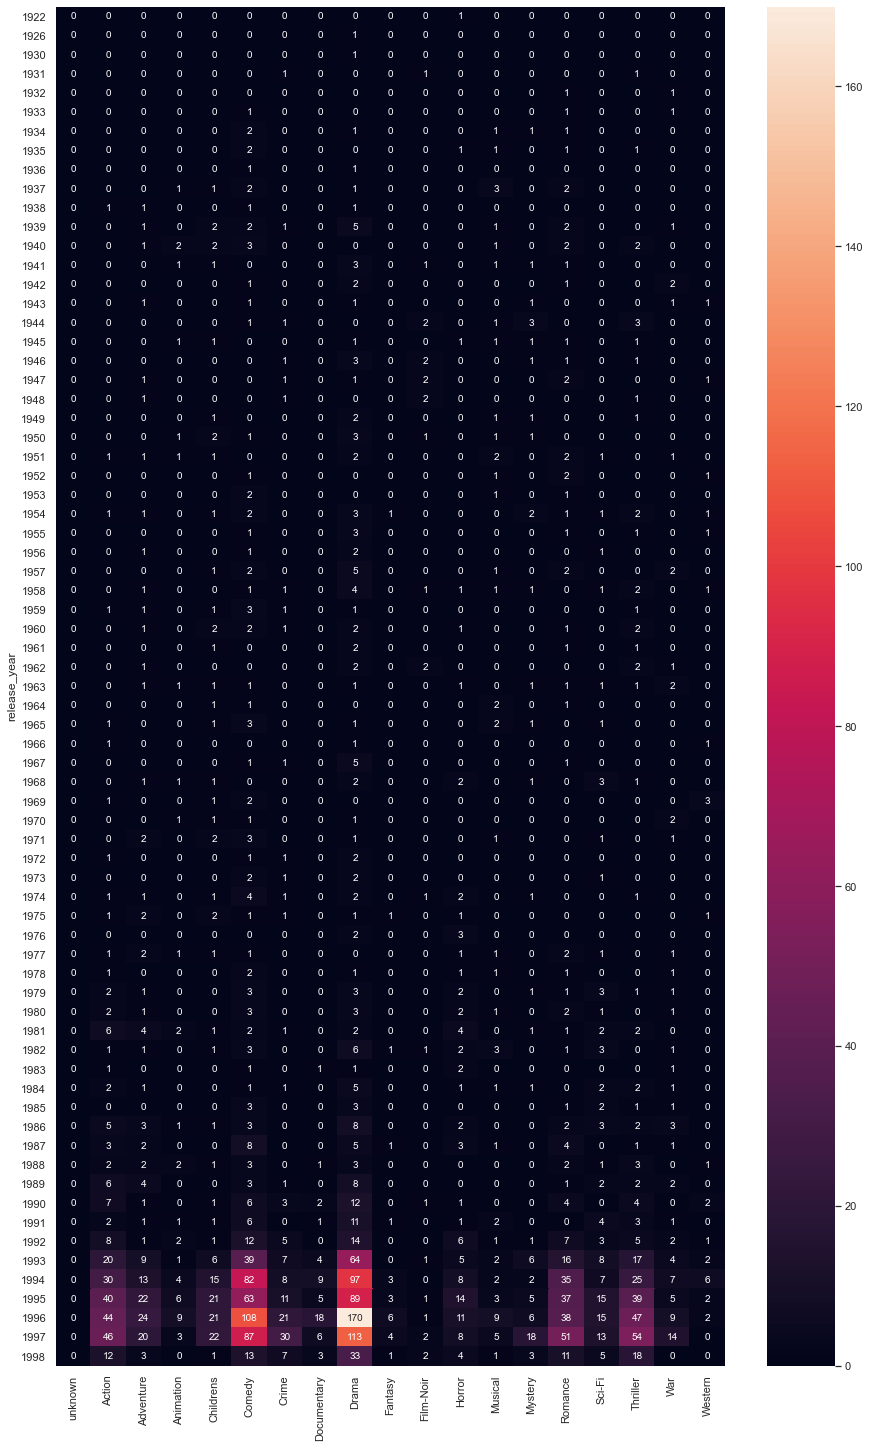

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,25))
sns.heatmap(mv, annot=True, fmt="d")


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [22]:
#your answer here
nrate=urate.merge(mvdata,left_on='movie id',right_on='movie id',suffixes=('_left', '_right'))
nrate=nrate.iloc[:,[2,4]]
mrate=nrate.groupby(['movie title']).count()
mrate.rename(columns={'rating':'n_of_ratings'},inplace=True)
mrate.sort_values(by='n_of_ratings',ascending=False,inplace=True)
#mrate = mrate[mrate.n_of_ratings > 100] 
mrate=mrate[mrate['n_of_ratings']>100]
mlist=list(mrate.index.values)
mlist[1:25]

['Contact ',
 'Fargo ',
 'Return of the Jedi ',
 'Liar Liar ',
 'English Patient, The ',
 'Scream ',
 'Toy Story ',
 'Air Force One ',
 'Independence Day (ID4) ',
 'Raiders of the Lost Ark ',
 'Godfather, The ',
 'Pulp Fiction ',
 'Twelve Monkeys ',
 'Silence of the Lambs, The ',
 'Jerry Maguire ',
 'Chasing Amy ',
 'Rock, The ',
 'Empire Strikes Back, The ',
 'Star Trek: First Contact ',
 'Back to the Future ',
 'Titanic ',
 'Mission: Impossible ',
 'Fugitive, The ',
 'Indiana Jones and the Last Crusade ']

In [23]:
vrate=urate.merge(mvdata,left_on='movie id',right_on='movie id',suffixes=('_left', '_right'))
#vrate=vrate.iloc[:,[2,4]]
#mrating=vrate.groupby(['movie title']).mean()
mrating=vrate.groupby(['movie title']).mean()[['rating']]
mrating.sort_values(by='rating',ascending=False,inplace=True)
mrating.reset_index()

#mrating = mrating.index.isin(mlist)
mrating=mrating.loc[mlist]
mrating.sort_values(by='rating',ascending=False,inplace=True)
mrating.head(25)

top25movies=mrating.head(25)
top25movies

,rating
movie title,
"Close Shave, A",4.491071
Schindler's List,4.466443
"Wrong Trousers, The",4.466102
Casablanca,4.456790
"Shawshank Redemption, The",4.445230
Rear Window,4.387560
"Usual Suspects, The",4.385768
Star Wars,4.358491
12 Angry Men,4.344000


In [24]:
#mlist[1:10]

In [25]:
mrating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, Close Shave, A  to Cable Guy, The 
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  334 non-null    float64
dtypes: float64(1)
memory usage: 5.2+ KB


# 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [26]:
#nrate=urate.merge(mvdata,left_on='movie id',right_on='movie id',suffixes=('_left', '_right'))
#allrate=nrate.merge(user,left_on='user id',right_on='user id',suffixes=('_left', '_right'))
#drama=allrate[allrate.Drama==1]
#drama=drama.loc[:,['rating','gender']]
#dramacount=drama.groupby('gender').count()
#dramacount.rename(columns={'rating':'persons_in_each_gender'},inplace=True)
#dramacount



In [27]:
merged = pd.merge(left=urate, right=mvdata, how='left', left_on='movie id', right_on='movie id')
merged = pd.merge(left=merged, right=user, how='left', left_on='user id', right_on='user id')
ratingCount = merged.groupby('gender').count()[['rating']]
ratingCount

,rating
gender,
F,25740
M,74260


In [28]:
dramaCount = merged.groupby('gender').sum()[['Drama']]
dramaCount

,Drama
gender,
F,11008.0
M,28887.0


In [29]:
dramaCount[['Drama']].div(ratingCount.rating, axis=0)

,Drama
gender,
F,0.427661
M,0.388998


In [30]:
scifiCount = merged.groupby('gender').sum()[['Sci-Fi']]
scifiCount

,Sci-Fi
gender,
F,2629.0
M,10101.0


In [31]:
scifiCount[['Sci-Fi']].div(ratingCount.rating, axis=0)

,Sci-Fi
gender,
F,0.102137
M,0.136022


In [32]:
RomanceCount = merged.groupby('gender').sum()[['Romance']]
RomanceCount

,Romance
gender,
F,5858.0
M,13603.0


In [33]:
RomanceCount[['Romance']].div(ratingCount.rating, axis=0)

,Romance
gender,
F,0.227584
M,0.183181


#### Conclusion:



Among female viewers, 42.77% watched drama while only 38.9% of male viewers watched drama.
Therefore, the statement that men watch more drama than women is incorrect; Similarly, 10.21% 
female watched Sci-Fi while 13.6% of male watched Sci-Fi. So, the statement that women watch 
more Sci-Fi than men is not correct either. Last but not least, 22.76% of female watched ramance while 18.32% of male watched ramance. Therefore, the statement that Men watch more Romance than women is also wrong.